**It involves building a predictive model that uses various customer attributes and historical data to forecast which customers are likely to churn in the future. The goal is to identify customers at risk of leaving the service so that the company can take proactive measures to retain them.**

In [ ]:
!pip install -U pandas-profiling

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from pandas_profiling import ProfileReport
import numpy as np

import warnings
warnings.filterwarnings('ignore')

D:\content\envs\myenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\content\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
D:\content\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# profile.to_notebook_iframe()

In [5]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=124)

In [89]:
drop_feat=  ['customerID','gender','PhoneService','MultipleLines', 'PaperlessBilling','PaymentMethod']
numeric_features = ['tenure', 'TotalCharges']
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

In [90]:
drop_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat)], remainder='passthrough')

In [91]:
pipeline = Pipeline([('drop_column', drop_transformer)])

In [92]:
pipeline.fit(X_train)

Pipeline(steps=[('drop_column',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

In [93]:
transformed_train=pipeline.transform(X_train)

In [94]:
transformed_train.view()

array([[0, 'No', 'Yes', ..., 'Month-to-month', 19.3, '19.3'],
       [0, 'Yes', 'No', ..., 'Month-to-month', 55.55, '1405.3'],
       [0, 'Yes', 'Yes', ..., 'Two year', 19.55, '1463.45'],
       ...,
       [0, 'No', 'No', ..., 'Month-to-month', 74.35, '533.6'],
       [0, 'No', 'No', ..., 'Month-to-month', 45.15, '98.5'],
       [1, 'No', 'No', ..., 'Month-to-month', 85.25, '2287.25']],
      dtype=object)

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.replace(r'^\s*$', np.nan, regex=True).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
def remove_spaces(input_df):
    input_df["TotalCharges"] = input_df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)
    return input_df

In [18]:
class SpaceImputeTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [19]:
pipeline = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('drop_column', drop_transformer)

                    ])

In [20]:
pipeline.fit(X_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x00000183A56CC100>),
                ('drop_column',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

In [21]:
transformed_train=pipeline.transform(X_train)

In [22]:
transformed_train

array([[0, 'No', 'Yes', ..., 'Month-to-month', 19.3, '19.3'],
       [0, 'Yes', 'No', ..., 'Month-to-month', 55.55, '1405.3'],
       [0, 'Yes', 'Yes', ..., 'Two year', 19.55, '1463.45'],
       ...,
       [0, 'No', 'No', ..., 'Month-to-month', 74.35, '533.6'],
       [0, 'No', 'No', ..., 'Month-to-month', 45.15, '98.5'],
       [1, 'No', 'No', ..., 'Month-to-month', 85.25, '2287.25']],
      dtype=object)

In [48]:
numeric_transformer = Pipeline(steps=[
                                     ('meanimputer', SimpleImputer(strategy='mean')),
                                     ('stdscaler', StandardScaler())
                                     ])

categorical_transformer = Pipeline(steps=[
                                         ('onehotenc', OneHotEncoder(handle_unknown='ignore'))
                                         ])

In [49]:
col_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat),
                                                   ('numeric_processing',numeric_transformer, numeric_features),
                                                    ('categorical_processing', categorical_transformer, categorical_features)
                                                  ], remainder='drop')

In [50]:
pipeline = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                    ])

In [51]:
pipeline.fit(X_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x00000183A6509C00>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract'])]))])

In [52]:
transformed_train=pipeline.transform(X_train)

In [53]:
transformed_train.shape

(4930, 34)

In [54]:
pd.DataFrame(transformed_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.287226,-1.008875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.311327,-0.392971,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.599807,-0.367131,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.351990,-0.602716,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.583246,1.010232,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-1.002589,-0.772179,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4926,0.420596,-0.489445,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4927,-1.043251,-0.780333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4928,-1.246563,-0.973681,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [55]:
pipeline.transform(X_test)

array([[ 1.55914459,  2.40019296,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.16523858, -0.88273919,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.35198988, -0.41821168,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5425837 , -0.60547135,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55914459,  2.44105325,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10801526, -0.73969485,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
pipeline.named_steps['transform_column'].transformers_[2][1]

Pipeline(steps=[('onehotenc', OneHotEncoder(handle_unknown='ignore'))])

In [59]:
cat_cols = pipeline.named_steps['transform_column'].transformers_[2][1].named_steps['onehotenc'].get_feature_names_out(input_features=categorical_features)


In [60]:
numeric_features+cat_cols.tolist()

['tenure',
 'TotalCharges',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year']

In [61]:
for name, estimator, features in pipeline.named_steps['transform_column'].transformers_:
  print(name)
  print(features)

drop_columns
['customerID', 'gender', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod']
numeric_processing
['tenure', 'TotalCharges']
categorical_processing
['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
remainder
[18]


In [62]:
pd.DataFrame(transformed_train, columns=numeric_features+cat_cols.tolist())

,tenure,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,-1.287226,-1.008875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.311327,-0.392971,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.599807,-0.367131,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.351990,-0.602716,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.583246,1.010232,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-1.002589,-0.772179,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4926,0.420596,-0.489445,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4927,-1.043251,-0.780333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4928,-1.246563,-0.973681,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
pipeline = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('logistics', LogisticRegression())
                    ])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x00000183A7F17BB0>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   Standar...)]),
                                                  ['tenure', 'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract'])])),
                ('logistics', LogisticRegression())])

In [65]:
pipeline.score(X_test, y_test)

0.8078561287269286

In [66]:
y_pred = pipeline.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[1409,  144],
       [ 262,  298]], dtype=int64)

In [69]:
import joblib

In [70]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [71]:
pipeline_loaded = joblib.load('pipeline.pkl')

In [72]:
pipeline_loaded.score(X_test, y_test)

0.8078561287269286

In [73]:
pipeline_loaded

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x00000183A7F50CA0>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   Standar...)]),
                                                  ['tenure', 'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract'])])),
                ('logistics', LogisticRegression())])

In [98]:
pipeline_lr = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('logistics', LogisticRegression())
                    ])

In [99]:
col_transformer_rf = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat),
                                                   ('numeric_processing',numeric_transformer, numeric_features)                                                 
                                                  ], remainder='drop')

In [100]:
pipeline_rf = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer_rf),
                     ('RForest', RandomForestClassifier())
                    ])

In [77]:
pipeline_all=[pipeline_lr, pipeline_rf]

In [78]:
for pipe in pipeline_all:
  pipe.fit(X_train, y_train)

In [79]:
for i,model in enumerate(pipeline_all):
  print(model.score(X_test, y_test))

0.8078561287269286
0.7349739706578324


In [80]:
grid_param = [
{"RForest": [RandomForestClassifier()],
"RForest__n_estimators":[10,50,100],  
"RForest__max_leaf_nodes": [5, 6,8]}]
gridsearch = GridSearchCV(pipeline_rf, grid_param, cv=5, verbose=1,n_jobs=-1) 

In [81]:
best_model = gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [82]:
best_model.score(X_test,y_test)

0.7628963558920966

In [103]:
col_transformer_rf = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat),
                                                   ('numeric_processing',numeric_transformer, numeric_features)                                                 
                                                  ], remainder='drop')

In [104]:
from xgboost import XGBClassifier
pipeline = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('XGBClassifier', XGBClassifier())
                    ])

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x00000183B495AB90>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   Standar...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [108]:
y_test=le.fit_transform(y_test)

In [109]:
pipeline.score(X_test, y_test)

0.7733080927591103

In [110]:
y_pred = pipeline.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(y_test, y_pred)

array([[1374,  179],
       [ 300,  260]], dtype=int64)

**Churn prediction using Auto_ViML**

In [117]:
!pip install autoviml --upgrade --ignore-installed

In [6]:
size = int(0.7*df.shape[0])
train_df = df[:size]
test_df = df[size:]

In [7]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [8]:
target='Churn'

==================== System Information ====================
System: Windows
Node Name: DESKTOP-49NM5GG
Release: 10
Version: 10.0.19041
Machine: AMD64
Processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
====================== CPU Information ======================
Physical cores: 6
Total cores: 6
==================== Memory Information ====================
Total: 23.94GB
Available: 10.20GB
Used: 13.73GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 21)
    Training Set Memory Usage = 0.79 MB
Test Set Shape = (2113, 21)
    Test Set Memory Usage = 0.34 MB
Single_Label Target: ['Churn']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          No:    3641  ->   73.9%
         Yes:    1289  ->   26.1%
String or Multi Class target: Chur

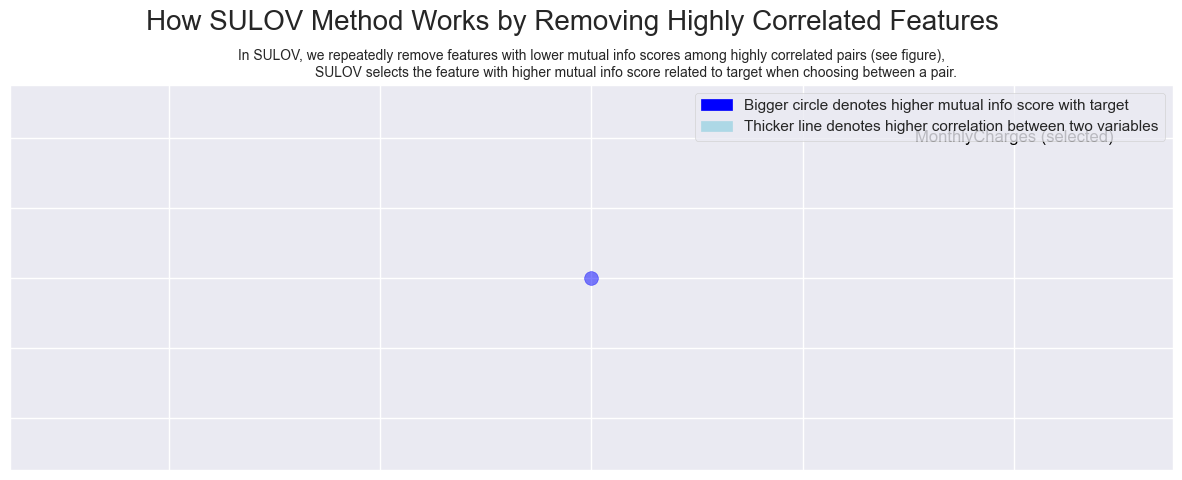

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (18) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 19 
    Finding Important Features using Boosted Trees algorithm...
        using 19 variables...
        using 15 variables...
        using 11 variables...
        using 7 variables...
        using 3 variables...
Found 14 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  3944 , CV rows =  986
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling o

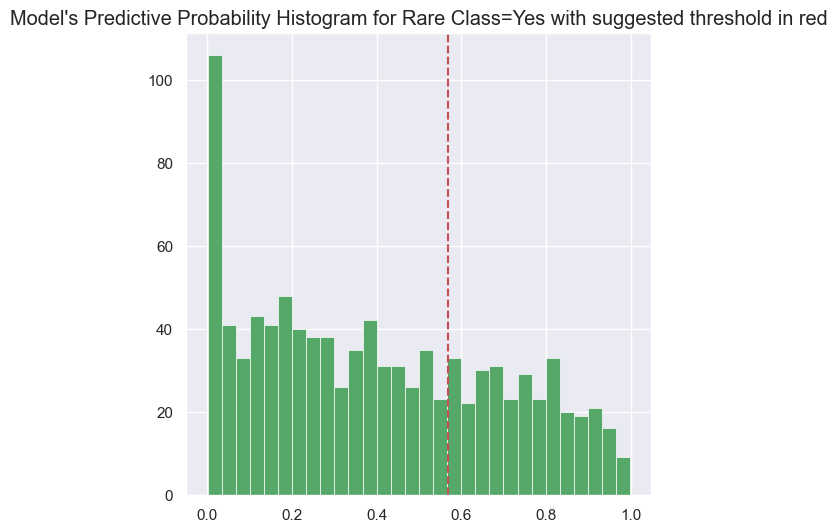

    Using threshold=0.5. However, 0.568 provides better F1=0.65 for rare class...
########################################################
SPE Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 80.0%
Balanced Accuracy = 77.55% with Threshold = 0.50
Confusion Matrix:
[[562 166]
 [ 57 201]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       728
           1       0.55      0.78      0.64       258

    accuracy                           0.77       986
   macro avg       0.73      0.78      0.74       986
weighted avg       0.81      0.77      0.78       986

Balanced Accuracy = 77.40% with Threshold = 0.57
Confusion Matrix:
[[605 123]
 [ 73 185]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       728
           1       0.60      0.72      0.65       258

    accuracy                           0.80       986
   macro avg       0.75      0.77      0.76    

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 80.4%
    Balanced Accuracy = 76.7%
    Precision         = 61.2%
    Average Precision = 74.8%
    Recall            = 69.0%
    F1 Score          = 64.8%
#####################################################
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       728
           1       0.61      0.69      0.65       258

    accuracy                           0.80       986
   macro avg       0.75      0.77      0.76       986
weighted avg       0.81      0.80      0.81       986

[[615 113]
 [ 80 178]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 90
    Binning_Flag set to False or there are no 

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 197
Writing Output files to disk...
    Saving predictions to .\Churn\Churn_Binary_Classification_test_modified.csv
    Saving predictions to .\Churn\Churn_Binary_Classification_submission.csv
    Saving predictions to .\Churn\Churn_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 3.3 for the Entire Process


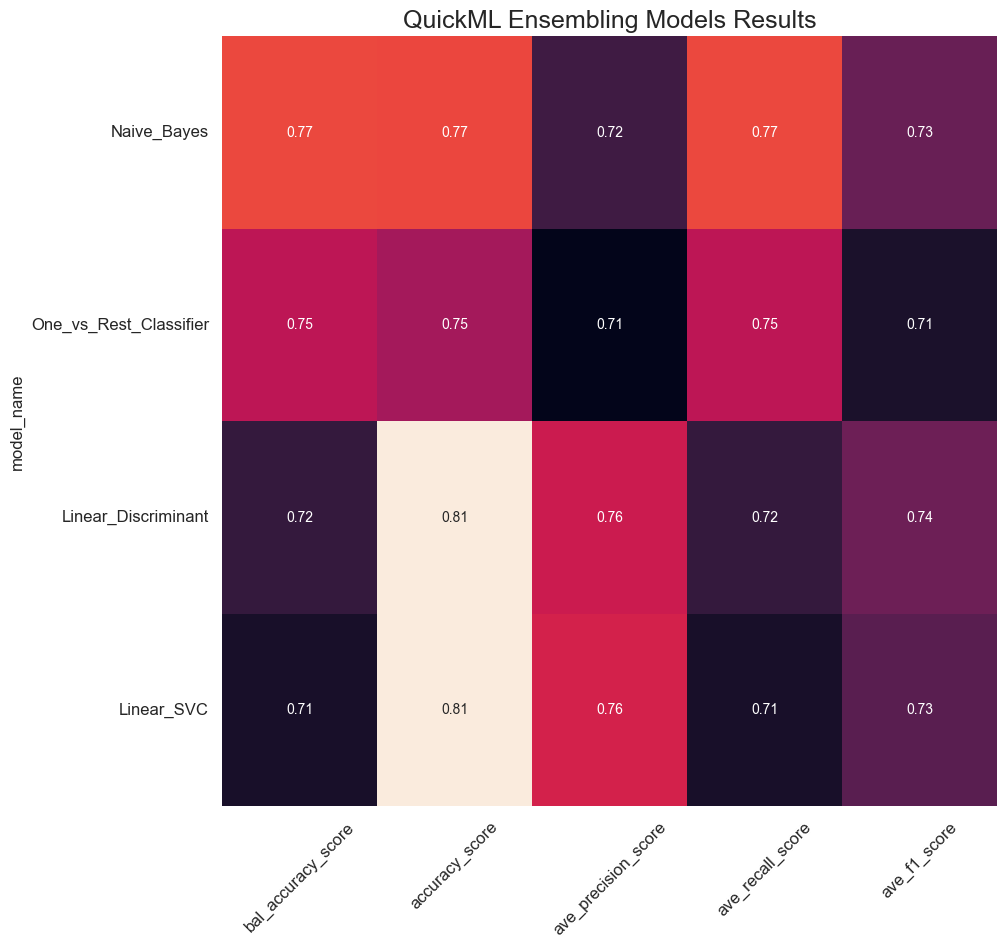

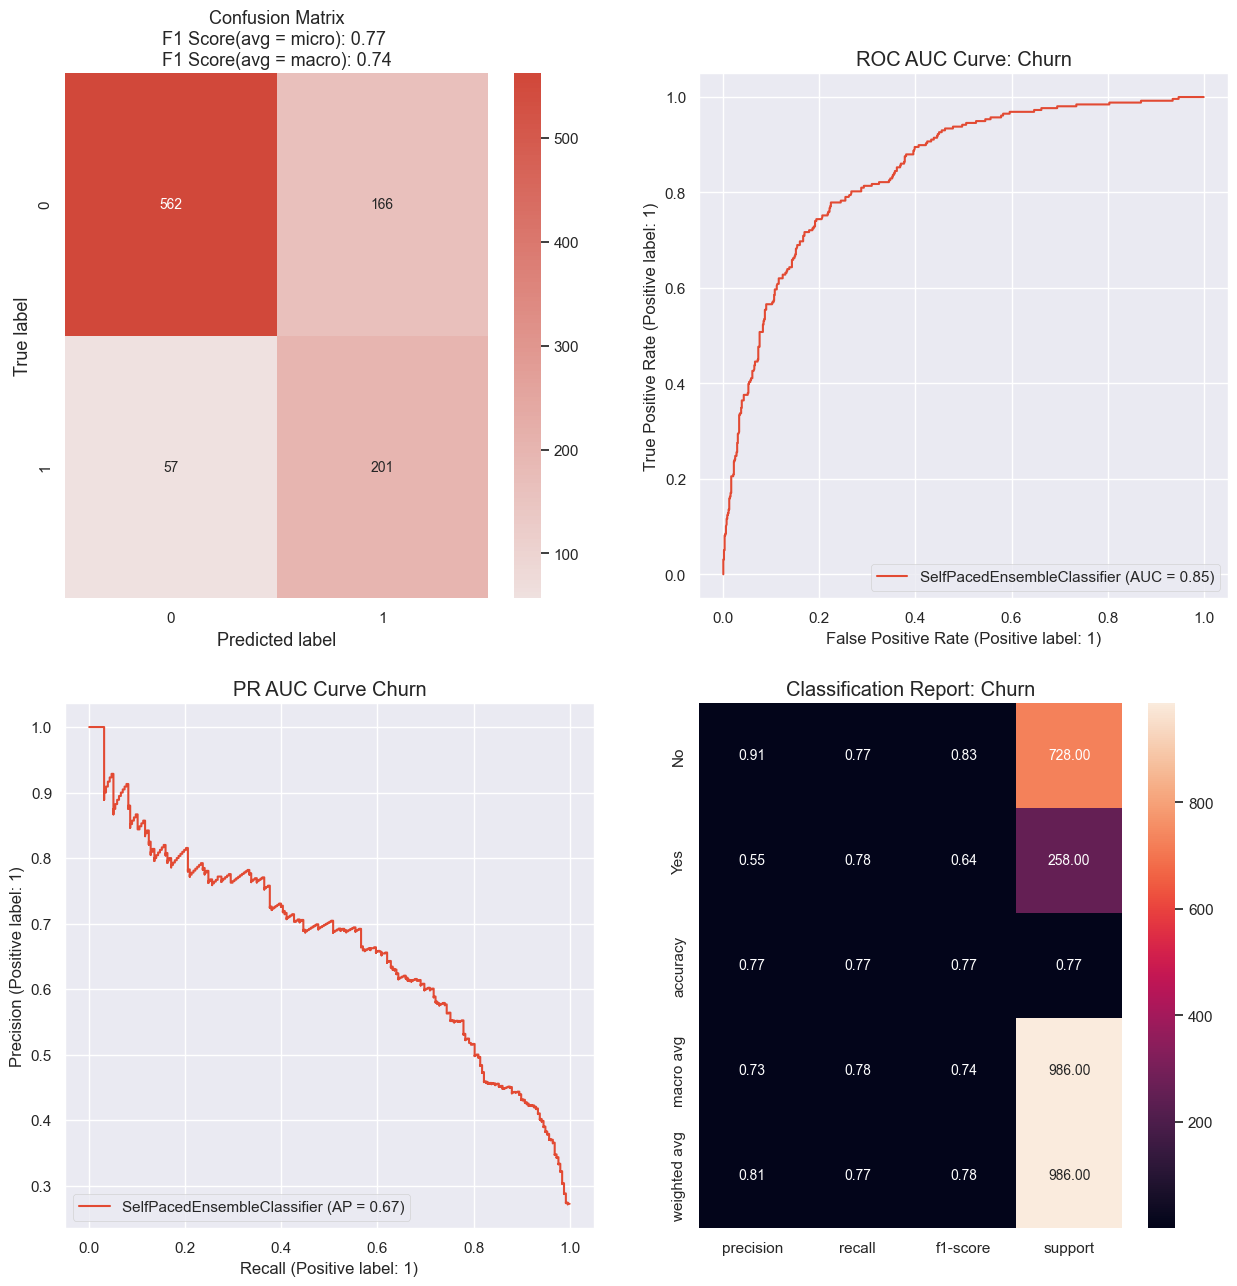

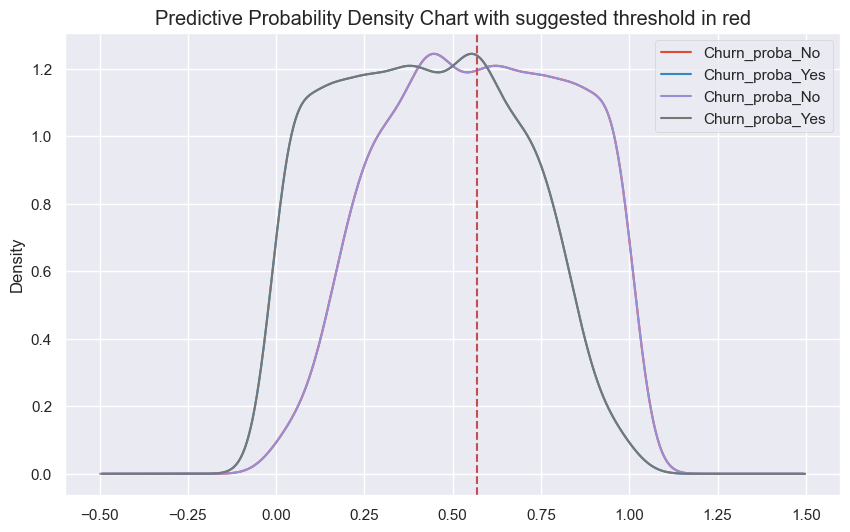

In [9]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=2)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [10]:
features

['Contract',
 'TechSupport',
 'OnlineSecurity',
 'InternetService',
 'tenure',
 'PaymentMethod',
 'MonthlyCharges',
 'OnlineBackup',
 'PhoneService',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines',
 'StreamingTV',
 'TotalCharges']

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
testm

,customerID,Contract,TechSupport,OnlineSecurity,InternetService,tenure,PaymentMethod,MonthlyCharges,OnlineBackup,PhoneService,StreamingMovies,PaperlessBilling,MultipleLines,StreamingTV,TotalCharges,Churn_proba_No,Churn_proba_Yes,Churn_predictions,Churn_Linear_Discriminant_predictions,Churn_Linear_SVC_predictions,Churn_Naive_Bayes_predictions,Churn_One_vs_Rest_Classifier_predictions,Churn_SPE_predictions,Churn_Ensembled_predictions
4930,8180-AKMJV,0.00,0.00,0.00,0.00,0.01,0.33,0.26,0.00,1.00,0.00,1.00,0.00,0.00,0.57,0.37,0.63,Yes,No,No,Yes,Yes,Yes,Yes
4931,4298-OYIFC,0.00,1.00,0.00,0.50,0.21,0.67,0.85,0.00,1.00,1.00,1.00,1.00,1.00,1.06,0.35,0.65,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4932,5566-SOEZD,0.50,0.00,1.00,0.50,0.38,0.33,0.62,1.00,1.00,0.00,1.00,0.00,0.00,1.11,0.71,0.29,No,No,No,No,No,No,No
4933,9842-EFSYY,0.00,0.00,1.00,0.00,0.06,1.00,0.39,1.00,0.00,1.00,1.00,0.50,1.00,1.11,0.43,0.57,No,No,Yes,No,Yes,No,No
4934,2272-WUSPA,1.00,0.00,1.00,0.50,1.00,0.67,0.92,1.00,1.00,1.00,1.00,1.00,1.00,1.37,0.81,0.19,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.50,1.00,1.00,0.00,0.33,1.00,0.66,0.00,1.00,1.00,1.00,1.00,1.00,1.09,0.59,0.41,No,No,No,No,No,No,No
7039,2234-XADUH,0.50,0.00,0.00,0.50,1.00,0.33,0.85,1.00,1.00,1.00,1.00,1.00,1.00,1.35,0.53,0.47,No,No,No,No,No,No,No
7040,4801-JZAZL,0.00,0.00,1.00,0.00,0.15,0.67,0.11,0.00,0.00,0.00,1.00,0.50,0.00,1.18,0.42,0.58,Yes,No,No,Yes,Yes,Yes,Yes
7041,8361-LTMKD,0.00,0.00,0.00,0.50,0.06,1.00,0.56,0.00,1.00,0.00,1.00,1.00,0.00,1.16,0.17,0.83,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [14]:
testm

,customerID,Contract,TechSupport,OnlineSecurity,InternetService,tenure,PaymentMethod,MonthlyCharges,OnlineBackup,PhoneService,StreamingMovies,PaperlessBilling,MultipleLines,StreamingTV,TotalCharges,Churn_proba_No,Churn_proba_Yes,Churn_predictions,Churn_Linear_Discriminant_predictions,Churn_Linear_SVC_predictions,Churn_Naive_Bayes_predictions,Churn_One_vs_Rest_Classifier_predictions,Churn_SPE_predictions,Churn_Ensembled_predictions
4930,8180-AKMJV,0.00,0.00,0.00,0.00,0.01,0.33,0.26,0.00,1.00,0.00,1.00,0.00,0.00,0.57,0.37,0.63,Yes,No,No,Yes,Yes,Yes,Yes
4931,4298-OYIFC,0.00,1.00,0.00,0.50,0.21,0.67,0.85,0.00,1.00,1.00,1.00,1.00,1.00,1.06,0.35,0.65,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4932,5566-SOEZD,0.50,0.00,1.00,0.50,0.38,0.33,0.62,1.00,1.00,0.00,1.00,0.00,0.00,1.11,0.71,0.29,No,No,No,No,No,No,No
4933,9842-EFSYY,0.00,0.00,1.00,0.00,0.06,1.00,0.39,1.00,0.00,1.00,1.00,0.50,1.00,1.11,0.43,0.57,No,No,Yes,No,Yes,No,No
4934,2272-WUSPA,1.00,0.00,1.00,0.50,1.00,0.67,0.92,1.00,1.00,1.00,1.00,1.00,1.00,1.37,0.81,0.19,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.50,1.00,1.00,0.00,0.33,1.00,0.66,0.00,1.00,1.00,1.00,1.00,1.00,1.09,0.59,0.41,No,No,No,No,No,No,No
7039,2234-XADUH,0.50,0.00,0.00,0.50,1.00,0.33,0.85,1.00,1.00,1.00,1.00,1.00,1.00,1.35,0.53,0.47,No,No,No,No,No,No,No
7040,4801-JZAZL,0.00,0.00,1.00,0.00,0.15,0.67,0.11,0.00,0.00,0.00,1.00,0.50,0.00,1.18,0.42,0.58,Yes,No,No,Yes,Yes,Yes,Yes
7041,8361-LTMKD,0.00,0.00,0.00,0.50,0.06,1.00,0.56,0.00,1.00,0.00,1.00,1.00,0.00,1.16,0.17,0.83,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [15]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Linear_SVC_predictions'].values))

[[1339  194]
 [ 244  336]]


In [16]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Linear_SVC_predictions'].values))

[[1339  194]
 [ 244  336]]


In [17]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1288  245]
 [ 215  365]]


In [19]:
print(classification_report(test_df[target].values,testm['Churn_One_vs_Rest_Classifier_predictions'].values))

              precision    recall  f1-score   support

          No       0.87      0.80      0.83      1533
         Yes       0.57      0.69      0.62       580

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.78      2113



In [20]:
print(classification_report(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85      1533
         Yes       0.60      0.63      0.61       580

    accuracy                           0.78      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.78      0.78      2113

